## 1. Searching for gold inside HTML files
<p>It used to take days for financial news to spread via radio, newspapers, and word of mouth. Now, in the age of the internet, it takes seconds. Did you know news articles are <em>automatically</em> being generated from figures and earnings call streams? Hedge funds and independent traders are using data science to process this wealth of information in the quest for profit.</p>
<p>In this notebook, we will generate investing insight by applying <a href="https://en.wikipedia.org/wiki/Sentiment_analysis">sentiment analysis</a> on financial news headlines from <a href="https://finviz.com">FINVIZ.com</a>. Using this <a href="https://en.wikipedia.org/wiki/Natural_language_processing">natural language processing</a> technique, we can understand the emotion behind the headlines and predict whether the market <em>feels</em> good or bad about a stock. It would then be possible to make educated guesses on how certain stocks will perform and trade accordingly. (And hopefully, make money!)</p>
<p><img src="https://assets.datacamp.com/production/project_611/img/fb_headlines.png" alt="Facebook headlines from FINVIZ.com"></p>
<p>Why headlines? And why from FINVIZ?</p>
<ol>
<li>Headlines, which have similar length, are easier to parse and group than full articles, which vary in length.</li>
<li>FINVIZ has a list of trusted websites, and headlines from these sites tend to be more consistent in their jargon than those from independent bloggers. Consistent textual patterns will improve the sentiment analysis.</li>
</ol>
<p>As <a href="https://en.wikipedia.org/wiki/Web_scraping">web scraping</a> requires data science ethics (sending a lot of traffic to a FINVIZ's servers isn't very nice), the HTML files for Facebook and Tesla at various points in time have been downloaded. Let's import these files into memory.</p>
<p><strong>Disclaimer: Investing in the stock market involves risk and can lead to monetary loss. The content in this notebook is not to be taken as financial advice.</strong> </p>

## Task 1: Instructions

Load the HTML file for each stock into memory.

* Create an empty dictionary and assign it to `html_tables`.

* In the for loop, load each stock's HTML file (which is in a directory called `datasets/`) into a BeautifulSoup object.

* Find `'news-table'` in the Soup and load it into `html_table`.

* Add an item to the dictionary with `table_name` as the key and `html_table` as the value.


BeautifulSoup documentation
https://www.crummy.com/software/BeautifulSoup/

BeautifulSoup DataCamp tutorial
https://www.datacamp.com/community/tutorials/tutorial-python-beautifulsoup-datacamp-tutorials

In [2]:
# Import libraries
from bs4 import BeautifulSoup
import os

html_tables = {}

# For every table in the datasets folder...
for table_name in os.listdir('datasets'):
    #this is the path to the file. Don't touch!
    table_path = f'datasets/{table_name}'
    # Open as a python file in read-only mode
    table_file = open(table_path, "r")
    # Read the contents of the file into 'html'
    html = BeautifulSoup(table_file)
    # Find 'news-table' in the Soup and load it into 'html_table'
    html_table = html.find(id="news-table")
    # Add the table to our dictionary
    html_tables[table_name] = html_table

In [3]:
for i in html_tables:
    print(i)

fb_05ene.html
fb_22sep.html
tsla_05ene.html
tsla_22sep.html
tsla_26nov.html


## 2. What is inside those files anyway?
<p>We've grabbed the table that contains the headlines from each stock's HTML file, but before we start parsing those tables further, we need to understand how the data in that table is structured. We have a few options for this:</p>
<ul>
<li>Open the HTML file with a text editor (preferably one with syntax highlighting, like <a href="http://www.sublimetext.com/">Sublime Text</a>) and explore it there</li>
<li>Use your browser's <a href="https://addons.mozilla.org/en-US/firefox/addon/web-developer/">webdev toolkit</a> to explore the HTML</li>
<li>Explore the headlines table here in this notebook!</li>
</ul>
<p>Let's do the third option.</p>

### Task 2: Instructions
Inspect Tesla's HTML file with BeautifulSoup.

* Find all of the `<tr>` tags in Tesla's BeautifulSoup object, which is loaded into `tsla`.
* For each row in Tesla's headlines table:
   * Read the text contents of the `<a>` tag.
   * Read the contents of the `<td>` tag.
   * Print the loop counter.

Helpful links:

The <tr> tag https://www.w3schools.com/tags/tag_tr.asp
The <td> tag https://www.w3schools.com/tags/tag_td.asp
The <a> tag https://www.w3schools.com/tags/tag_a.asp

In [5]:
# Read one single day of headlines 
# tsla_22sep.html มาจากโหลดไฟล์เข้า dict ข้างบน
tsla = html_tables['tsla_22sep.html'] 
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'
tsla_tr = tsla.findAll('tr')

# For each row...
for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.a.get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.td.get_text()
    # Print the count
    print(f'File number {i+1}:')
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)
    # The following exits the loop after four rows to prevent spamming the notebook, do not touch
    if i == 3:
        break

File number 1:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
File number 2:
Broadcoms Stock Looks Like a Winner
09:30PM  
File number 3:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
File number 4:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


## 3. Extra, extra! Extract the news headlines
<p>As we saw above, the interesting data inside each table row (<code>&lt;tr&gt;</code>) is in the text inside the <code>&lt;td&gt;</code> and <code>&lt;a&gt;</code> tags. Let's now actually parse the data for <strong>all</strong> tables in a comfortable data structure.</p>

### Task 3: Instructions
Extract key information from each stock's BeautifulSoup object.

* Write and if/else control structure to deal with the scraped text into `time` or `date` and `time`.

* Extract the ticker name from the name of the file.

* Save all these fields to the `parsed_news` list, making a list of lists.

The date is only available once before the headline, on the first headline of the day. Because we are parsing the headlines chronologically, we only need to read the variable date once per day as the time changes with every headline (the date does not).

This is arguably the hardest part of the project from the coding point of view. In the real world, this is the kind of bottleneck where a lot of Data Scientist struggle, so don't give up and keep polishing your scraping skills!

In [7]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.get_text() 
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, x.a.text])

## 4. Make NLTK think like a financial journalist
<p>Sentiment analysis is very sensitive to context. As an example, saying <em>"This is so addictive!"</em> often means something positive if the context is a video game you are enjoying with your friends, but it very often means something negative when we are talking about opioids. Remember that the reason we chose headlines is so we can try to extract sentiment from financial journalists, who like most professionals, have their own lingo. Let's now make NLTK think like a financial journalist by adding some new words and sentiment values to our lexicon.</p>

### Task 4: Instructions
Tune NLTK/VADER to fit the context of financial news headlines.

- Make an instance of `SentimentIntensityAnalyzer` using the existing lexicon.

- Update the lexicon with new words.

Before being able to load in the VADER lexicon, you have to download it using the command:

```
nltk.download('stopwords')
```
But in this project, this step has already been done for you.

Helpful links:

- VADER source code
https://www.nltk.org/_modules/nltk/sentiment/vader.html

- Command to add new words
https://stackoverflow.com/questions/40481348/is-it-possible-to-edit-nltks-vader-sentiment-lexicon

In [9]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

## 5. BREAKING NEWS: NLTK Crushes Sentiment Estimates
<p>Now that we have the data and the algorithm loaded, we will get to the core of the matter: programmatically predicting sentiment out of news headlines! Luckily for us, VADER is very high level so, in this case, we will not adjust the model further<sup>*</sup> other than the lexicon additions from before.</p>
<p><sup>*</sup>VADER "out-of-the-box" with some extra lexicon would likely translate into <strong>heavy losses</strong> with real money. A real sentiment analysis tool with chances of being profitable will require a very extensive and dedicated to finance news lexicon. Furthermore, it might also not be enough using a pre-packaged model like VADER.</p>

### Task 5: Instructions
Score the headlines and save them in a DataFrame.

- Convert the list of lists from task 3 into a `pandas` DataFrame.
- Get the polarity scores for all headlines iterating through it.
- Convert the result above into a DataFrame.
- Join both DataFrames in order to add the score to it.

Calculating the scores is relatively easy to the slightly awkward pandas needed `here`, as `vader` was not designed with `pandas` in mind. There are several ways of doing this, for example, `df.apply`, but there is no way of avoiding having to convert back the results to `DataFrame` and merge back with a `df.join` or similar.

VADER is more high level than most of NLTK and was not designed specifically for the purpose of analyzing journalists headlines. If you are considering doing something like this with real money, I would suggest building something like VADER yourself starting from core NLTK.

Helpful links:

- The difference between using Vader and more low level NLTK

http://www.nltk.org/howto/sentiment.html

- pandas joins guide

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [11]:
import pandas as pd
# Use these column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(data=parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(i) for i in scored_news['headline']]
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames
scored_news = pd.concat([scored_news, scores_df], axis=1)
# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

In [12]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'ticker']).mean()
# Unstack the column ticker
mean_c = mean_c.unstack()
# Get the cross-section of compound in the 'columns' axis
display(mean_c.head())
mean_c = mean_c['compound']
mean_c.head()

DEBUG:matplotlib:$HOME=/home/repl
DEBUG:matplotlib:CACHEDIR=/home/repl/.cache/matplotlib
INFO:matplotlib.font_manager:font search path ['/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf', '/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/afm', '/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
DEBUG:matplotlib.font_manager:trying fontname /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/local/lib/python3.6/dist-packages/ma

DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/msttcorefonts/arialbd.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/msttcorefonts/Trebuchet_MS_Italic.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/msttcorefonts/ariblk.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/truetype/msttcorefonts/cour.ttf
DEBUG:matplotlib.font_manager:trying fontname /usr/share/fonts/

DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/li

DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/georgiai.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/verdanaz.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/Verdana_Bold.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/Courier_New_Bold_Italic.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/georgiab.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: /usr/share/fonts/truetype/msttcorefonts/Trebuchet_MS_Bold.ttf
DEBUG:matplotlib.font_manager:create

DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Bold.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/afm/pzdr.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Times-Italic.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/afm/pcrr8a.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/afm/cmsy10.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/afm/ptmr8a.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/afm/pcrro8a.afm
DEBUG:matplotlib.font_manager:createFontDict: /usr/local/lib/python3.6/dist-packages/matp

compound                 neg                 neu            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2018-09-18 -0.052564 -0.085650  0.104864  0.112875  0.843682  0.807688   
2018-09-19  0.057568 -0.025949  0.072920  0.066732  0.805560  0.879244   
2018-09-20  0.018447  0.148757  0.059567  0.067304  0.870233  0.762609   
2018-09-21  0.014310 -0.030190  0.052762  0.102150  0.886381  0.813900   
2018-09-22  0.255300       NaN  0.000000       NaN  0.899000       NaN   

                 pos            
ticker            fb      tsla  
date                            
2018-09-18  0.051455  0.079438  
2018-09-19  0.121640  0.054000  
2018-09-20  0.070200  0.170087  
2018-09-21  0.060857  0.083950  
2018-09-22  0.101000       NaN

ticker,fb,tsla
date,,
2018-09-18,-0.052564,-0.085650
2018-09-19,0.057568,-0.025949
2018-09-20,0.018447,0.148757
2018-09-21,0.014310,-0.030190
2018-09-22,0.255300,NaN


DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


## 6. Plot all the sentiment in subplots
<p>Now that we have the scores, let's start plotting the results. We will start by plotting the time series for the stocks we have.</p>

### Task 6: Instructions
Plot a bar chart with all the mean polarity scores.

- Group the headlines by `date` and `ticker` name.
- Unstack the column `ticker`.
- Plot the bar chart with the resulting DataFrame.

Helpful links:

- `df.plot.bar()` function documentation
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

- pandas MultiIndexes documentation
http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


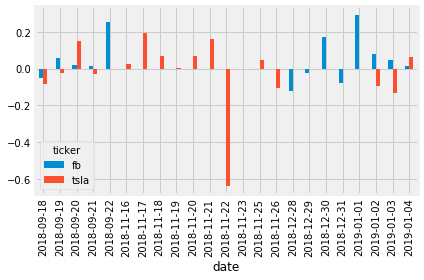

In [14]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'ticker']).mean()
# Unstack the column ticker
mean_c = mean_c.unstack()
# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs('compound', axis=1)
# Plot a bar chart with pandas
mean_c.plot.bar()

## 7. Weekends and duplicates
<p>What happened to Tesla on November 22nd? Since we happen to have the headlines inside our <code>DataFrame</code>, a quick peek reveals that there are a few problems with that particular day: </p>
<ul>
<li>There are only 5 headlines for that day.</li>
<li>Two headlines are verbatim the same as another but from another news outlet.</li>
</ul>
<p>Let's clean up the dataset a bit, but not too much! While some headlines are the same news piece from different sources, the fact that they are written differently could provide different perspectives on the same story. Plus, when one piece of news is more important, it tends to get more headlines from multiple sources. What we want to get rid of is verbatim copied headlines, as these are very likely coming from the same journalist and are just being "forwarded" around, so to speak.</p>

### Task 7: Instructions
Take care of weekends and duplicates by discarding them.

- Count the number of headlines.
- Drop duplicates using the `drop_duplicates` method, setting the `subset` based on `ticker` and `headline`.
- Count the number of headlines after dropping duplicates.
- Print the result of the before and after in order to check that what you did had an effect.

In [16]:
scored_news.shape[0]

500

In [17]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.shape[0]
# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset=['ticker', 'headline'])
# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.shape[0]
# Print before and after numbers to get an idea of how we did 
f"Before we had {num_news_before} headlines, now we have {num_news_after}"

'Before we had 500 headlines, now we have 476'

## 8. Sentiment on one single trading day and stock
<p>Just to understand the possibilities of this dataset and get a better feel of the data, let's focus on one trading day and one single stock. We will make an informative plot where we will see the smallest grain possible: headline and subscores.</p>

### Task 8: Instructions
Extract the 3rd of January for the Facebook stock.

- Select the cross-section of the Facebook row.
- Select the 3rd of January.
- Convert the datetime string column to be a time column exclusively.
- Set the index to the time column and sort by it.

In [19]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.loc['fb']
# Select the 3rd of January of 2019
single_day = single_day.loc['2019-01-03']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time'])
display(single_day)
single_day = single_day.set_index('time')
# Sort it
single_day = single_day.sort_index()

,time,headline,compound,neg,neu,pos
date,,,,,,
2019-01-03,2023-11-24 22:59:00,[$$] Facebook Begins New Year in Fixer-Upper Mode,0.0000,0.000,1.000,0.000
2019-01-03,2023-11-24 17:45:00,Investors Are Focused Too Closely on Facebook ...,0.5859,0.000,0.652,0.348
2019-01-03,2023-11-24 17:24:00,Facebook (FB) Reportedly Testing Dark Mode on ...,0.0000,0.000,1.000,0.000
2019-01-03,2023-11-24 16:10:00,"Google Stock Upgraded, Viewed As 'Most Defensi...",0.1010,0.000,0.878,0.122
2019-01-03,2023-11-24 15:26:00,Is Facebook Stock the Best FANG Stock to Buy?,0.6369,0.000,0.656,0.344
2019-01-03,2023-11-24 15:14:00,Zuckerberg Paused His Selling of Facebook Shar...,0.6249,0.000,0.662,0.338
2019-01-03,2023-11-24 13:36:00,What's Next For Apple (AAPL) After It Slashed ...,-0.2263,0.147,0.853,0.000
2019-01-03,2023-11-24 13:31:00,Take the Money And Run From Twilio Stock,0.0000,0.000,1.000,0.000
2019-01-03,2023-11-24 12:25:00,3 Great Reasons You Should Be Bullish on Twili...,0.6249,0.000,0.661,0.339


In [20]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])
# Cross-section the fb row
single_day = single_day.loc['fb']
# Select the 3rd of January of 2019
single_day = single_day.loc['2019-01-03']
# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time'])
single_day['time'] = single_day['time'].dt.time
# Set the index to time and 
single_day = single_day.set_index('time')
# Sort it
single_day = single_day.sort_index()
single_day

,headline,compound,neg,neu,pos
time,,,,,
06:00:00,Why Internet Censorship Doesnt Work and Never ...,0.0000,0.000,1.000,0.000
08:04:00,"3 Big Stock Charts for Thursday: Medtronic, Fa...",0.0000,0.000,1.000,0.000
09:07:00,"The Zacks Analyst Blog Highlights: Facebook, W...",0.2500,0.000,0.846,0.154
09:12:00,Why The FAANGs Are Crucial To A 2019 Market Rally,0.0000,0.000,1.000,0.000
09:34:00,Apple warning stoking fears of slowdown in Chi...,-0.6369,0.426,0.574,0.000
09:48:00,"Stock Market News For Jan 3, 2019",0.0000,0.000,1.000,0.000
09:58:00,Facebook Falls 3%,-0.9993,0.981,0.019,0.000
10:08:00,Mark Zuckerberg Halts Stock Sales as Facebook ...,0.2960,0.000,0.784,0.216
10:21:00,Facebook Under Fire for Collecting Data From A...,-0.3400,0.231,0.769,0.000


## 9. Visualize the single day
<p>We will make a plot to visualize the positive, negative and neutral scores for a single day of trading and a single stock. This is just one of the many ways to visualize this dataset.</p>

### Task 9: Instructions
Visualize the scores for the day and score we selected.

- Drop the `compound` and `headline` columns.
- Change the score columns names to `negative`, `positive`, and `neutral`.
- Plot a stacked bar chart with the result.

### Note from the Instructor

Thanks for making it to the end! Here are a few plotting tips and the last plotting line for you as a bonus. :-)

Don't forget to add the colors and the title. Also, it does not hurt to make the plot bigger (if your screen resolution allows for it) and to add a legend on the side.

Pretty plots are not just for aesthetics, they also allow better communication and understanding of the data:

```
plot_day.plot.bar(stacked = True, 
                  figsize=(10, 6), 
                  title = TITLE, 
                  color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))
```

`pandas` does not like annotating the y-axis, but I do. Also, a semicolon after the last `Matplotlib` line of code will stop Jupyter from rendering the plot object string name:

```
plt.ylabel("scores");
```

Here's some more info on NLTK.
https://www.nltk.org/howto/sentiment.html

In [22]:
TITLE = "Negative, neutral, and positive sentiment for FB on 2019-01-03"
COLORS = ["red","orange", "green"]
# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(columns=['compound', 'headline'])
# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']
# Plot a stacked bar chart
plot_day.plot.bar(stacked = True, 
                  figsize=(10, 6), 
                  title = TITLE, 
                  color = COLORS).legend(bbox_to_anchor=(1.2, 0.5))

AttributeError: 'ellipsis' object has no attribute 'columns'